<a href="https://colab.research.google.com/github/sofiacorreao/Proyecto-Final-/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Se van a utilizar dos modelos de clasificación (Modelo KNN y Arbóles de decisión) para determinar si una persona va a sufrir un ataque cardíaco o no**



**0. Cargar las librerias de referencia para el modelo**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #Libreria de graficos
import matplotlib.pyplot as plt #Gráficador de cosas
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier

**1. Se procede con la carga de los datos del archivo.**

In [ ]:
nxl='/content/heart.csv'
XDB=pd.read_csv(nxl)
XDB=XDB.dropna() #Elimina celdas vacias o sin datos
XDB.head(100)

#Se procede con la seleccion de las variables de trabajo
XD=np.array(XDB[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
                 'exng', 'oldpeak', 'slp', 'caa', 'thall']]) #Datos entrada
yd=np.array(XDB[['output']]) #Este es el dato que quiero que el modelo pronostique

XDB.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


**2. Análisis preliminar de la base de datos**

In [ ]:
print('La base de datos tiene',XDB.shape[0],'registros y',XDB.shape[1],'variables')

La base de datos tiene 303 registros y 14 variables


In [ ]:
print('La base de datos tiene', XDB.isnull().sum().sum(),'datos nulos')

La base de datos tiene 0 datos nulos


In [ ]:
print('La base de datos tiene', XDB.duplicated().sum().sum(),'registro duplicado')

La base de datos tiene 1 registros duplicados


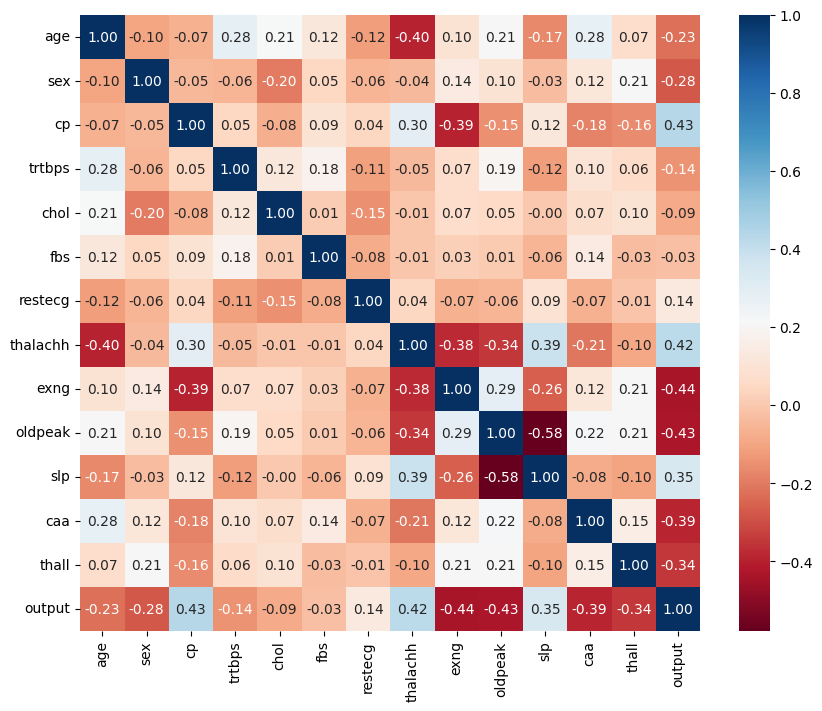

In [ ]:
#Se crea el gráfico de correlación
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))  # Cambia los valores para ajustar el tamaño a tu preferencia

# Crear el heatmap
sns.heatmap(XDB.corr(), annot=True, fmt='.2f', cmap='RdBu');

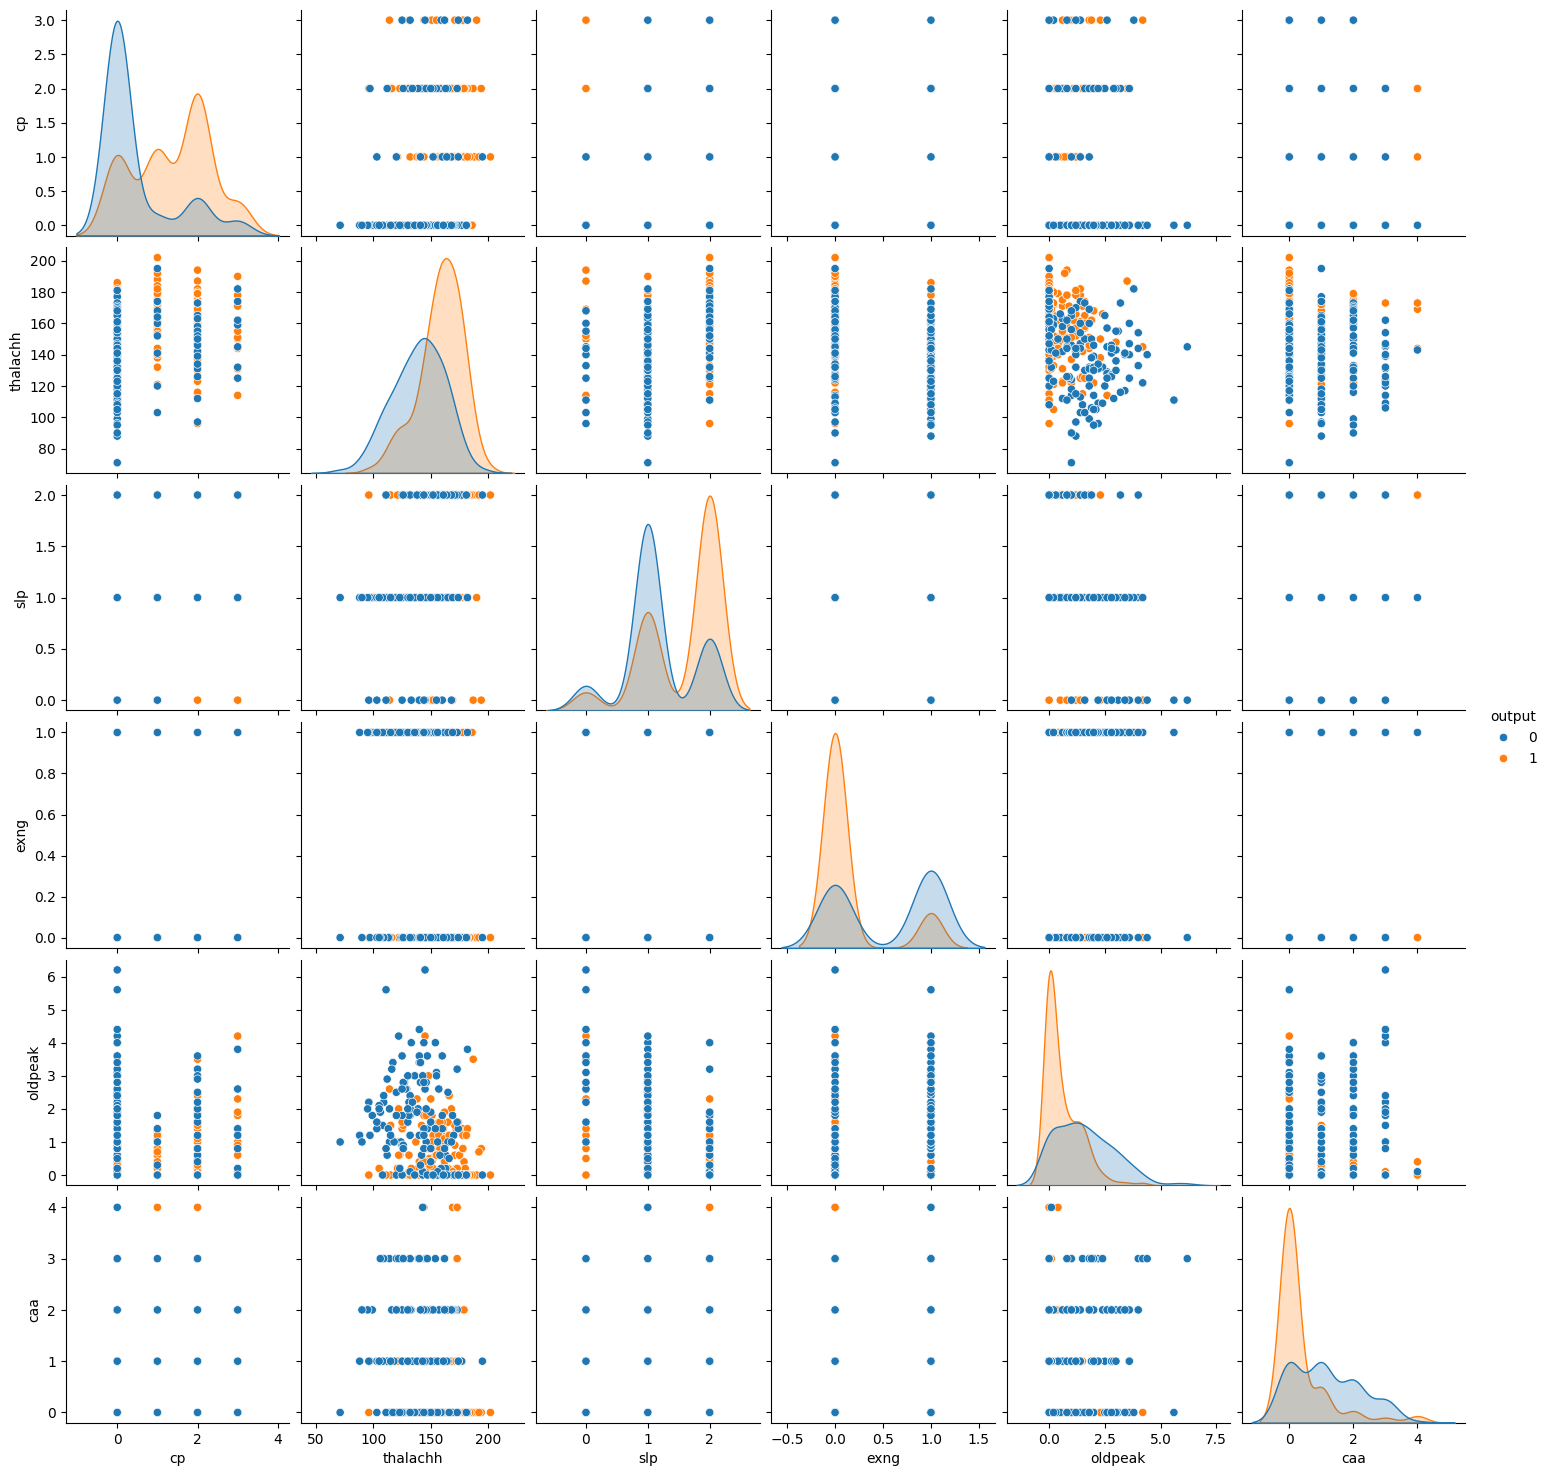

In [ ]:
sns.pairplot(XDB, hue='output', vars=['cp', 'thalachh', 'slp', 'exng', 'oldpeak', 'caa']);

In [ ]:
XDB.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**3. Creacion del modelo - Decision Tree**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_split=4)
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

#Evaluamos el modelo
VN=cm [0,0]
FP=cm [0,1]
FN=cm[1,0]
VP=cm[1,1]

Ex=(VN+VP)/(VN+VP+FN+FP) #Que porcentaje de los datos prónostico correctamente
print('La exactitud alcanzada por el modelo es:',Ex)
Se= VP/(FN+VP)
print('La sensibilidad alcanzada por el modelo fue:',Se)
Es=VN/(VN+FP)
print('La especificidad alcanzada por el modelo fue:',Es)

[[102  36]
 [ 11 154]]
La exactitud alcanzada por el modelo es: 0.8448844884488449
La sensibilidad alcanzada por el modelo fue: 0.9333333333333333
La especificidad alcanzada por el modelo fue: 0.7391304347826086


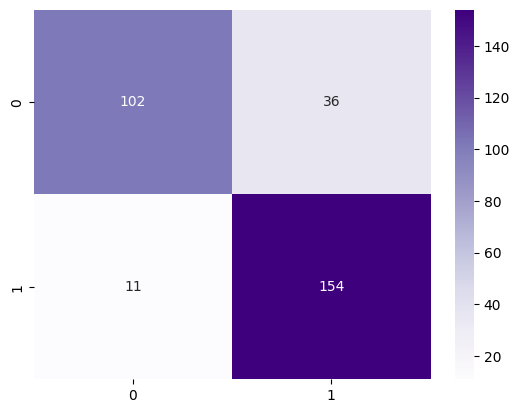

In [ ]:
sns.heatmap(cm, annot=True,fmt='d' ,cmap='Purples');

In [ ]:
#Gráficar el árbol
#Estas son las librerias para gráficar el arbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
    'exng', 'oldpeak', 'slp', 'caa', 'thall'] #Son los titulos para los nodos
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

**4. Implementamos el modelo KNN**

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=14) #Tomar 14 vecinos
mknn.fit(XD,yd) #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print('Esta es la matriz de confusion:/n',cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print('Exactitud:',Exac)
print('Sensibilidad:',Sen)
print('Especificidad:',Spec)

Esta es la matriz de confusion:/n [[ 96  42]
 [ 44 121]]
Exactitud: 0.7161716171617162
Sensibilidad: 0.7333333333333333
Especificidad: 0.6956521739130435


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


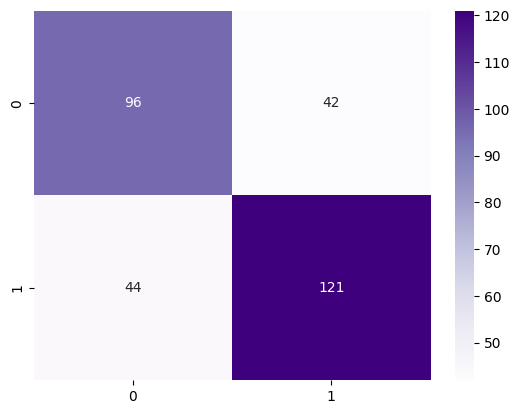

In [ ]:
sns.heatmap(cm, annot=True,fmt='d' ,cmap='Purples');

**5. Evaluamos a una persona con ciertas características, utilizando el modelo árbol de decisión para determinar si esta persona va a sufrir un ataque cardíaco o no**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_split=4)
mar.fit(XD,yd)
ydp=mar.predict(XD)

XDi = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
ydi = mar.predict(XDi)
print('La persona sufrirá un ataque cardiaco: ', ydi)

La persona sufrirá un ataque cardiaco:  [1]


**Ánalisis**

Al comparar el modelo de Árbol de Decisión y el modelo KNN, el Árbol de Decisión destaca con un rendimiento superior en exactitud (84.48% vs. 71.6%) y sensibilidad (93.33% vs. 73.3%).

Esto sugiere que el Árbol de Decisión es más eficaz en la detección de casos positivos, lo cual es crucial en un contexto clínico para identificar personas en riesgo de ataque cardíaco.

Aunque ambos modelos presentan una especificidad moderada, el Árbol de Decisión mantiene un mejor balance entre precisión y sensibilidad, lo que lo convierte en una opción más robusta y confiable para esta tarea de clasificación, al tratar temas sensibles como enfermedades.

Mejorar la especificidad en el Modelo KNN debería ser una prioridad para reducir los falsos positivos, y no asustar a pacientes diciendoles que si podrían tener un ataque cardíaco.